In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier

In [223]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [224]:
init = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].reset_index(drop=True)
init.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

<Axes: ylabel='Age'>

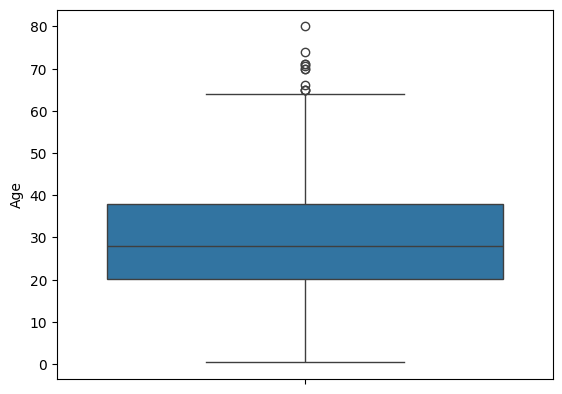

In [225]:
sns.boxplot(init['Age'])

In [226]:
init['Age'].fillna(init['Age'].median(), inplace=True)
init.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [227]:
features = init[['Pclass', 'Sex', 'Age', 'Fare']].reset_index(drop=True)
target = init['Survived']

In [228]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    train_size=0.85
)

In [229]:
enc = LabelBinarizer(sparse_output=False)
X_train['encoded_Sex'] = enc.fit_transform(X_train['Sex'])
X_train.drop(columns='Sex', inplace=True)
X_train

,Pclass,Age,Fare,encoded_Sex
93,3,26.0,20.5750,1
817,2,31.0,37.0042,1
120,2,21.0,73.5000,1
332,1,38.0,153.4625,1
743,3,24.0,16.1000,1
...,...,...,...,...
94,3,59.0,7.2500,1
21,2,34.0,13.0000,1
417,2,18.0,13.0000,0
457,1,28.0,51.8625,0


In [230]:
X_test['encoded_Sex'] = enc.transform(X_test['Sex'])
X_test.drop(columns='Sex', inplace=True)
X_test

,Pclass,Age,Fare,encoded_Sex
259,2,50.0,26.0000,0
830,3,15.0,14.4542,0
596,2,28.0,33.0000,0
780,3,13.0,7.2292,0
507,1,28.0,26.5500,1
...,...,...,...,...
842,1,30.0,31.0000,0
856,1,45.0,164.8667,0
242,2,29.0,10.5000,1
659,1,58.0,113.2750,1


In [231]:
model = DecisionTreeClassifier(criterion='entropy')

In [232]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [233]:
model.score(X_test, y_test)

0.8059701492537313

In [235]:
# to get better idea, checking mean model score over the course of several train-test iterations
training_scores = np.array([])
testing_scores = np.array([])
iterations = 100
for i in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(
        features,
        target,
        train_size=0.85
        )
    X_train['encoded_Sex'] = enc.fit_transform(X_train['Sex'])
    X_train.drop(columns='Sex', inplace=True)
    X_test['encoded_Sex'] = enc.transform(X_test['Sex'])
    X_test.drop(columns='Sex', inplace=True)
    training_scores = np.append(training_scores, model.score(X_train, y_train))
    testing_scores = np.append(testing_scores, model.score(X_test, y_test))
print(f"Mean training score after {iterations} iterations: {np.average(training_scores)}")
print(f"Mean testing score after {iterations} iterations: {np.average(testing_scores)}")

Mean training score after 100 iterations: 0.9551519154557465
Mean testing score after 100 iterations: 0.9548507462686566
